# 분류란?

### 정의하기

분류(分類)는 개념이나 주체를 인지하고, 차별화하고, 이해하는 과정을 말한다. 
<br>분류는 주체가 범주 안에 있는 것을 암시하며, 보통 특정한 목적을 가지고 있다. 
<br>개념적으로 범주는 지식의 주체와 개체 사이의 관계를 서술해 준다. 분류는 언어, 추측, 추론, 의사결정, 
<br>그리고 환경과 관련한 모든 종류의 상호 작용에 필수적이다.

기계학습의 분류
분류 는 데이터를 여러 카테고리의 클래스로 분리하는 데 도움이되는 모델 (함수)을 찾거나 발견하는 과정입니다. 
<br>분류에서 문제의 그룹 구성원이 식별됩니다. 즉, 데이터가 일부 매개 변수에 따라 다른 레이블로 분류 된 다음,
<br>데이터에 대해 레이블이 예측됩니다. 예시(iris)

입력변수: $x_n$ 목표변수: $t_n$ n은 데이터의 인덱스이다. 이때 $t_n$은 0인 class이면 0, 1인 class이면 1을 갖는다. 
<br>여기서 $t_n$사이에 라벨 값 사이에는 큰 상관관계가 없다. (독립적이다.) 참고로 회귀일때는 $t_n$ 사이에는 
<br>선형적이거나 비선형적인 크기 관계가 있었다.(연속적인 데이터를 추측하기 때문) 

여기서 다루는 데이터: 곤충의 몸무게에 따른 성별을 구분

In [1]:
#데이터 생성
import numpy as np
import matplotlib.pyplot as plt
X_min = 0
X_max = 2.5
X_n = 30 #데이터는 30개
#데이터별 색깔
X_color=['cornflowerblue', 'gray']
X = np.zeros(X_n)
np.random.seed(seed = 0)
T = np.zeros(len(X), dtype = np.uint8) #target은 0과 1밖에 없어서 
Dist_s = [0.4, 0.8] #분포의 시작지점
Dist_w = [0.8, 1.6] #분포의 폭
Pi = 0.5 #데이터를 나누는 기준점이 된다. 
for n in range(X_n):
    wk = np.random.rand()   #랜덤 설정하는 방법 np.random.seed(seed=?) np.random.rand()사용

    T[n] = 0*(wk < Pi) + 1*(wk >= Pi) #(wk<PI)는 boolean이다. 크면 1반환 작으면 0을 반환
    X[n] = np.random.rand()*Dist_w[T[n]]+Dist_s[T[n]]

print('X='+str(np.round(X, 2)))
print('T='+str(T))
    

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


In [2]:
def show_data1(x, t):
    K = np.max(t)+1 #T의 제일 큰 값은 1이다. 
    for k in range(K): #0과 1을 그리는 것이기 때문에 2가 필요하다. 
        plt.plot(x[t==k], t[t==k],X_color[k], alpha=0.5, linestyle='none', marker='o')
        #x[t==k], t[t==k] k와 label이 같은 것끼리 그리기
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0, 1])

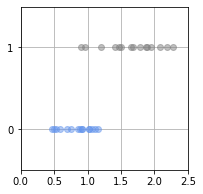

In [3]:
fig = plt.figure(figsize=(3, 3))
show_data1(X,T)

우리가 원하는 것: 데이터를 잘 구별하는 선을 긋기

'단순히 확률을 이용하여 구별하기'

1. 1.2이상은 수컷이고 0.8이하는 암컷인 걸 알지만
2. 0.8과 1.2사이에 있는 곤충을 어떻게 구별할까?란 의문에서 시작
3. 0.8과 1.2사이에 암컷이 수컷보다 2배로 많다면? 0.8~1.2구간에서 암컷일 확률은 2/3, 수컷은 1/3으로 결정!

P(t=1|x): 조건부 확률 불확실한 영역을 확률적인 예측으로 표현: 불확실성을 명확하게 표현이 가능.
<br>해석: 입력x가 존재할때, target이 1일 확률

조건부 확률
<br>확률론에서 조건부 확률(條件附確率, 영어: conditional probability)은 주어진 사건이 일어났다는 가정 하에 다른 한 사건이 일어날 확률을 뜻한다. 원래의 확률 함수를 Pr()라고 할 때, 사건 B가 일어났다는 가정 하에 사건 A가 일어날 조건부 확률은 Pr(A|B)로 표기한다.

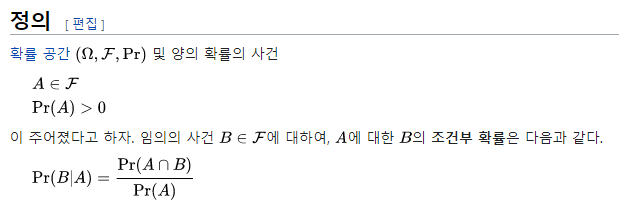

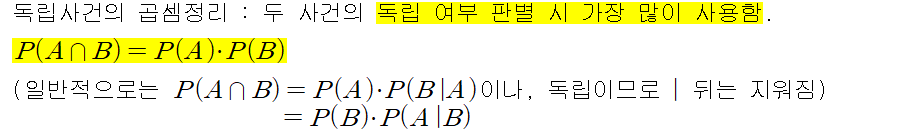

### 최대가능 도법

0.8<x<1.2를 실제 데이터에서 추론하기

1. 0.8<x<1.인 곳에 서 t가 처음 3번은 0 그다음은 1인 것을 알아냄
2. t=[0, 0, 0, 1]이다. 이걸 확률적으로 분석
3. P(t=1|x) = w라는 단순한 모델을 고려 (0<w<1) w는 x의 데이터중 t가1일 확률을 나타낸 매개변수이다.
4. 연속으로 일어난 확률이라 곱할 예정이다. 
<br>우도를 계산할 때, 0이 발생할 확률 \* 0이 발생활 확률 \* 0이 발생활 확률 \*1이 발생할 확률로 계산한다.   
5. 1이 일어날 확률: w 0이 일어날 확률: 1-w
$$ P(T = 0, 0, 0, 1|x) = (1-w)\times(1-w)\times (1-w)\times (w)  $$

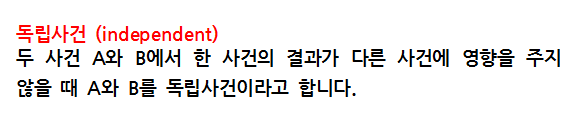

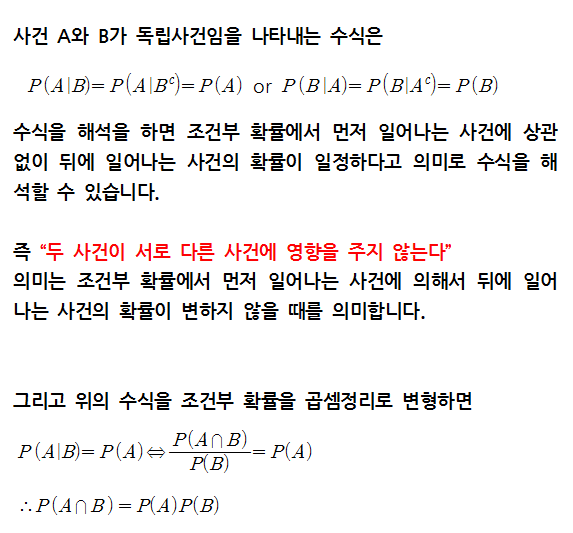

여기서 중요한 점: 이전에 일어난 사건과 그다음에 일어나는 사건은 서로 독립이므로 곱할 수 있다.

여기서 T를 활용하여 예측하는 것: 0이 일어나고 0이 일어나고 0이 일어나고 1이 일어난 상황인데 이때, 0이 될 확률은 얼마니?
<br>순서도 꼭 고려해야 한다.

$$P(T = 0, 0, 0, 1)=(1-w)^3w$$

근데 이게 왜 최대 로그우도냐? 이 곱셈식에서 제일 큰 값을 가지는 w를 원하기 때문이다!

이때! 제곱이 되어서 곱하기 연산과 함수의 미분을 하는 것이 너무 귀찮음-> '로그'를 이용
<br>그렇게 로그 우도가 탄생!

근데 로그가 붙어도 되나요? f(x)가 log(f(x))되었을 때, f(x)의 최대점의 위치 = logf((x))의 최대점의 위지

$$log(1-w)^3w=3log(1-w)+logw $$

어떤 함수의 최대값에서 -를 붙이면? (x축 대칭이 되면서)최소값이 된다. 이를 이용해 로그함수의 최대값을 구하는게 아닌 
<br>목적함수의 최솟값을 찾는 것이 목표기 때문에 로그 함수에 -를 붙인다. 

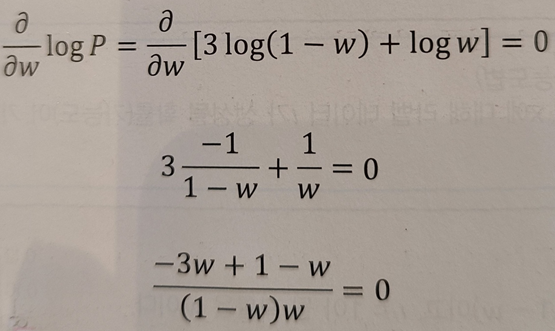

로그 함수를 미분하여 w=1/4인 곳에서 최대점이 나오는 것을 발견

### 로지스틱 회귀모델

물론! 0, 0, 0, 1이 잘 생성되기 위해서 w=1/4가 나오긴 나왔지만, 원래 확률이 일정하게 유지하는 구간이 존재하지 않을 수 있다.
<br>w=1/4라고 정의하고 데이터를 봤는데 현실에서는 1이 갑자기 많다든지....등등

로지스틱 회귀 모델을 이용!

로지스틱 회귀 모델이란? 시그모이드안에 회귀 모델(독립변수의 선형적인 결합)을 넣은 것이다!

$$ \frac{1}{1+exp(-(w_0x+w_1))} $$

로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년[1]에 제안한 확률 모델로서 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법이다.

로지스틱 회귀의 목적은 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것이다. 이는 독립 변수의 선형 결합으로 종속 변수를 설명한다는 관점에서는 선형 회귀 분석과 유사하다. 하지만 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.

흔히 로지스틱 회귀는 종속변수가 이항형 문제(즉, 유효한 범주의 개수가 두개인 경우)를 지칭할 때 사용된다.
<br>데이터와 라벨의 선형적인 관계를 파악: 이를 분류에 활용

로지스틱 회귀는 일반적인 선형 모델(generalized linear model)의 특수한 경우로 볼 수 있으므로 선형 회귀와 유사하다. 하지만, 로지스틱 회귀의 모델은 종속 변수와 독립 변수 사이의 관계에 있어서 선형 모델과 차이점을 지니고 있다. 첫 번째 차이점은 이항형인 데이터에 적용하였을 때 종속 변수 y의 결과가 범위[0,1]로 제한된다는 것이고 두 번째 차이점은 종속 변수가 이진적(1아니면 0밖에 없음)이기 때문에 조건부 확률(P(y│x))의 분포가 정규분포 대신 이항 분포를 따른다는 점이다.

이때 이항분포: 연속적이지 않은 분포
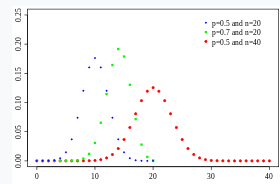

 이 함수에 data x를 넣으면 범주 1에 속할 확률을 반환해 준다. 하지만 이 확률을 이용해 결국 y를 0과 1에  mapping 시켜야 되기 때문에 이를 구분 짓는 경계가 필요하다. 여기서 이 경계(dicision boundary)는 우리의 추정값인 h(x)에 전적으로 의존하며 실제 train data와는 무관하다.

그럼 왜 처음부터 선형 회귀를 사용하지 않은 것인가?
<br>단순히 선형회귀 모델을 사용하지 않고, 굳이 시그모이드 함수를 사용해야 하는 이유는
<br>사건이 발생하고, 발생하지 않는 결과를 선형으로 표현하게 됐을 때 문제점이 발생하기 때문이다.
<br> X에 따라 어떤 사건이 일어난다고 가설을 세우고 그래프를 그렸다.
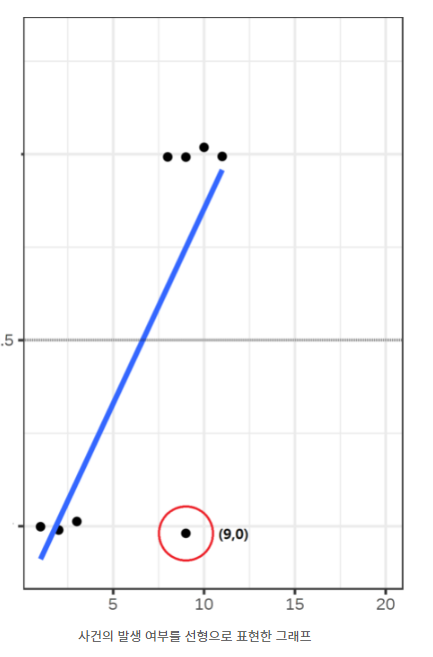
<br>위 그림은 시그모이드 함수를 사용하지 않고, 선형으로만 사건의 발생 여부를 표현했을 때의 그래프이다.
<br>대부분 x값이 5보다 크면 사건이 발생하고, 5보다 작으면 사건이 발생하지 않는다고 나타내고 있다.
<br>하지만 x가 9 임에도 불구하고, 사건이 발생하지 않아, 해당 경우일 때의 값을 그래프에 추가했다고 가정해보자.
<br>기존에는 5보다 크다면 사건이 발생할 것이라고 예측했던 모델에 큰 문제가 발생하게 될 것이다.
<br>분명 5보다 큰 값임에도 불구하고, 사건이 발생하지 않았기 때문이다.
<br>즉, 새로운 값의 추가가 기존 분류 모델에 큰 영향을 미치게 되는 문제점이 발생한다. 노이즈에 민감하다.

 WX가 양수인 영역에서 y를 1로 음수인 영역에서 y를 0으로 mapping 시키자. 이때 나누는 기준인 WX = 0 (하이퍼 플레인)이 Dicision boundary가 된다. 입력 벡터가 2차원인 경우에 다음과 같이 시각화할 수 있다.

In [4]:
def logistic(x, w):
    y = 1 / (1+np.exp(-(w[0]*x+w[1])))
    return y

0.5를 넘는 지점 i의 최솟값: 50 0.5252310760920885


1.25

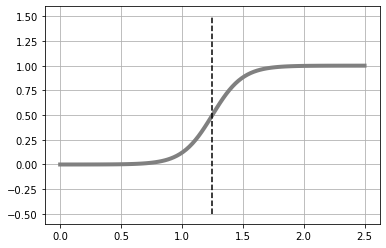

In [5]:
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth = 4)
    
    i=np.min(np.where(y>0.5)) #y값이 0.5를 바로 넘는 곳 설정, 0.52인 지점의 i를 설정
    print("0.5를 넘는 지점 i의 최솟값:",i,y[i])
    B=(xb[i-1]+xb[i])/2 
    plt.plot([B, B], [-.5, 1.5], color = 'k', linestyle="--") #결정 선은 무조건 직선 그리기 [X시작점, X 끝점],[Y시작점, Y끝점]
    plt.grid(True)
    return B

W=[8, -10]
show_logistic(W)

시그모이드는 분류를 잘 하기 위한 확률값을 내보내주며 이러한 출력값을 decision boundary에 비추어 0아니면 1로 mapping한다.
<br>decision boundary가 0.5인 경우, 출력값이 0.5 이상이면 1, 0.5 이하는 0으로 mapping이 될 것이다. 

여기서의 목적: 곤충의 데이터의 분포에 맞는 w_0과 w_1을 생성하기
<br>무게가 x일때 이를 잘 분류하는 w_0과 w_1을 만들기

### CrossEntropy정의

T가 0이면 1-y의 확률이 나오고 T가 1이면 y가 나온다.

$$ P(t|x)=y^t(1-y)^t  $$

이를 수식화 하였다.

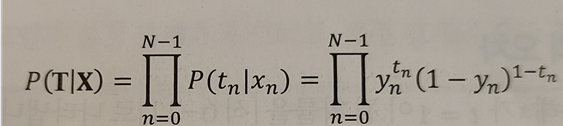

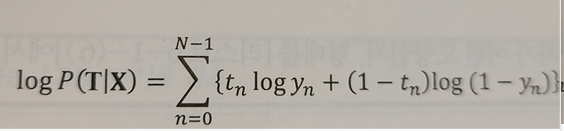

곱셈에서 덧셈으로 간단하게 바꾸기 위해 로그를 취하기

최대우도추정법 (Maximum Likelihood Estimation)
<br>MLE 는 각 관측값에 대한 총 가능도(모든 가능도의 곱)가 최대가 되는 분포를 찾는 추정법이다. 
<br>가정한 분포를 이루는 θ를 업데이트 해가면서 분포를 움직인다. 
<br>계속해서 움직이다 보면 분명 Likelihood 가 제일 큰 부분에 오게 될테고 우리는 잘 추정했다고 결론 내리는 것이다.
<출처>https://devkihyun.github.io/study/Machine-learining-and-Probability/

알아야 하는 사전지식: 엔트로피와 정보이론
<br>엔트로피: 데이터의 불확실성을 정량화한 값, 사건이 발생할 확률이 낮으면 낮을수록 커진다.
<br>정보이론: 정보량을 측정하는 이론으로 어떤 사건이 일어날 확률이 적을수록 정보량이 높다.(엔트로피가 높다.)

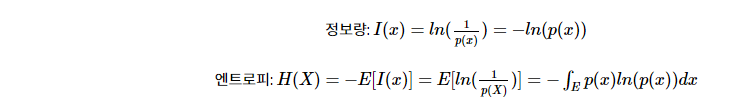

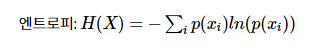 르베르 적분을 이용

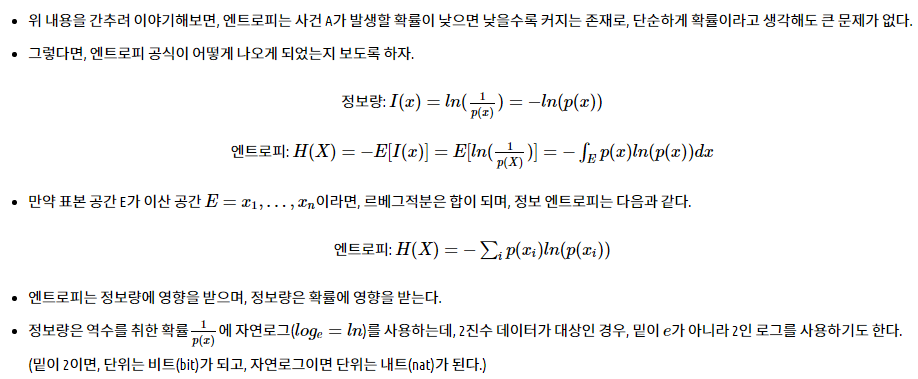

교차엔트로피란?
<br>P에 대한 확률분포 Q가 있을 때, Q가 P와 얼마나 비슷한지를 나타내는 의미가 있다.
<br>$t_n$은 정답이므로 0과 1밖에 없다. $y_n$은 1이 될 확률을 내포한다. y와 t가 비슷한 확률 분초를 가진다면?
<br>목적함수가 낮아질 수 있다. 그리고 log()안의 숫자가 1에서 0으로 갈때 기하 급수적으로 증가하기 때문에 
<br>잘못 예측할 경우 더 큰 벌을 받을 수 있다.

<br>우리가 교차엔트로피로 원하는 것: 입력데이터 x와 그에따른 t의 관계를 이용하여 가설을 만들고 입력이 들어올 때 확률을 예측하는데, 이 때 확률이 t의 값과 최대한 비슷하게 만들기. 최대한 비슷하면 뭐가 좋을까? 불확실성이 줄어든다. 데이터가 어떤 원리로 생성되는지 어느정도 추론이 가능해진다.

<출처> https://theeluwin.postype.com/post/6080524

교차엔트로피: $\sum p(x_i)\ln q(x_i)$이 때 q(x_i)는 내가 생각하는 확률 분포이다.
<br>두 분포의 차이를 알고싶으면?? 엔트로피에서 교차엔트로피를 뺀다!!!
<br>KL Divergence가 탄생한다!!

$$KL Divergence=엔트로피-교차엔트로피=-\sum p(x_i) \log(p(x_i))+\sum p(x_i) \log (q(x_i))$$

이진 분류와 교차 엔트로피
<br>이진분류에도 교차엔트로피가 필요하다.
<br>질문: 이진분류는 0이나 1으로 
<br>

In [6]:
def logistic(x, w):
    y = 1 / (1+np.exp(-(w[0]*x+w[1])))
    return y

In [7]:
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1-t[n])* np.log(1-y[n]))
    cee /= X_n
    return cee

W=[1, 1]
cee_logistic(W, X, T)

1.0288191541851066

### 평균 엔트로피의 오차를 구하기

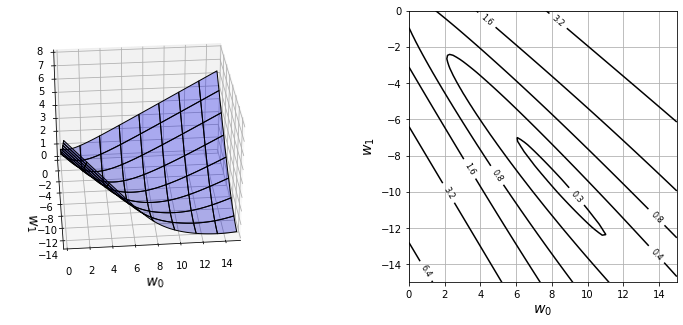

In [8]:
from mpl_toolkits.mplot3d import Axes3D

xn = 80
w_range = np.array([[0, 15] , [-15, 0]])
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn) #w0은 0부터 15까지 바뀜
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn) #w1은 1-5부터 0까지 바뀜  w0과 w1의 2변수 함수로 그래프를 그리기
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i in range(xn):
    for j in range(xn):
        w[0]=x0[i]
        w[1]=x1[j]
        C[j, i]= cee_logistic(w, X, T)
plt.figure(figsize=(12, 5))
#plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)


plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

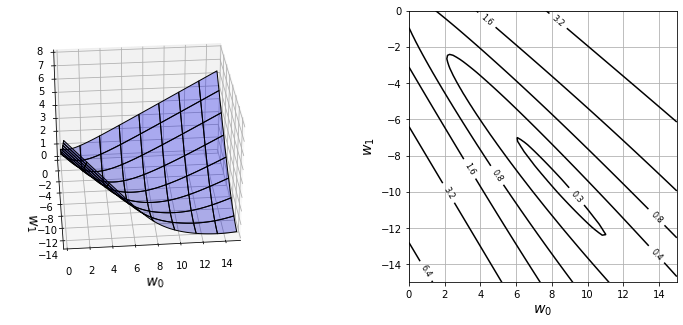

In [9]:
from mpl_toolkits.mplot3d import Axes3D

xn = 80
w0_range = np.array([0, 15])
w1_range = np.array([-15, 0])
w0 = np.linspace(w0_range[0],w0_range[1], xn) #w0은 0부터 -15까지 바뀜
w1 = np.linspace(w1_range[0], w1_range[1], xn) #w1은 15부터 0까지 바뀜  w0과 w1의 2변수 함수로 그래프를 그리기
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = [w0, w1]
for i in range(xn):
    for j in range(xn):
        C[j, i]= cee_logistic((w0[i], w1[j]), X, T)
plt.figure(figsize=(12, 5))
#plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)


plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

BCE 
<br> $$ \sum_{i=0}^{배치사이즈-1} P(x)\log (Q(x))+(1-P(x)) \log (1-Q(x))  $$(P(x)는 라벨값이며 이진 분류이기 때문에 1아니면 0이다. 만약 P(x)=1인 경우, 1-P(x)=0이 되기 때문에 앞의 항만 살아 남는다.)


Loglikelihood 
<br> $$ \sum_{i=0}^{배치사이즈-1} P(x)\log (Q(x))  $$

결론: BCE와 LogLikelihood는 수식적으로 같다! 대신 로그우도는 카테골가 여러개인 경우에 자주 사용한다. 

### 학습규칙의 도출

해석해를 구할 수 없다. 왜? $y_n$은 비선형 함수를 포함하기 때문이다. 

평균 교차 엔트로피를 미분해보기

$y_n$을 $w_0$에 대해 미분하려면? 연쇄법칙을 이용
1. 로그 식을 $y_n$에 대해 미분해야 한다.
2. $y_n$을 만들어주는 로지스틱 시그모이드를 미분해야한다. 
3. 로지스틱 시그모이드 안에 있는 선형 회귀식 $w_0x_0+w_1$을 미분해야한다.

1. $E_n(w) = -t_nlog(y_n)-(1-t_n)log(1-y_n) $

2. $ y_n = \frac{1}{1+e^(w_0x_0+w_1)} $

3. $ w_0x_0+w_1을 w_0에 대해 미분          $

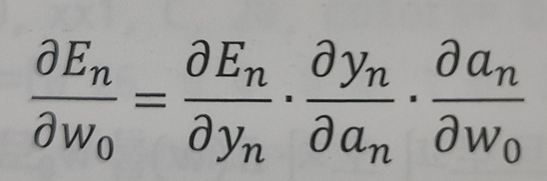

$$E(w) = \frac{1}{N} = \sum_{n = 0}^{N - 1}E_n(w)$$

1. $E_n(w) = -t_nlog(y_n)+(1-t_n)log(1-y_n) $에서 $y_n$이 출력 값이라서 $y_n$에 대해미분

$$ \frac{dE_n(w)}{dy_n} = -t_n \cdot \frac{1}{y_n} \cdot(y_n이 나오는 시그모이드 식 미분)-(1-t_n) \cdot \frac{1}{1-y_n}\cdot (-y_n을 미분)$$

$$(-\frac{t_n}{y_n}+\frac{1-t_n}{1-y_n}) \times(y_n)을 미분한 식 $$

2.$  y_n = \frac{1}{1+e^{-(w_0x_0+w_1)}}을 미분하기  $

$$(\sigma(x) )' = (\sigma(x))(1-\sigma(x))    $$을 활용하여 $y_n(1-y_n)이 된다.$

3. $w_0x_0+w_1$을 w_0에대해 미분해서 x_n을 도출한다.

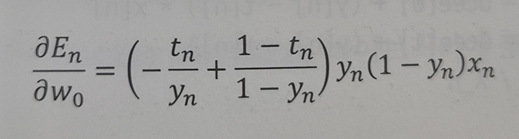

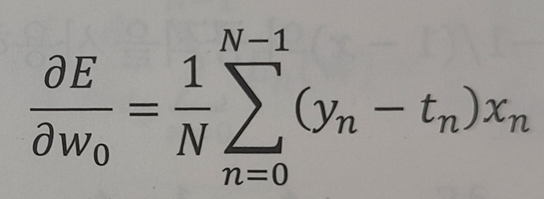


분모 정리하고 식을 간단히 하면 이렇게 나온다.

$w_1$에 대해 미분할 경우, 마지막에 x_n이 없는 것 빼고 같은 식이 나온다.

In [10]:
def logistic(x, w):
    y = 1 / (1+np.exp(-(w[0]*x+w[1])))
    return y

def dcee_logistic(w, x, t):
    y = logistic(x, t)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n]) 
    dcee = dcee / X_n
    return dcee


In [11]:
W = [1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

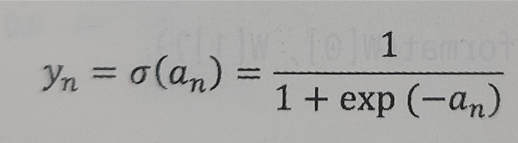
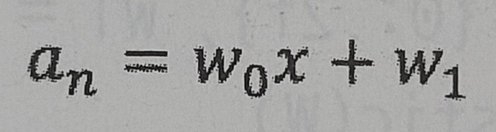

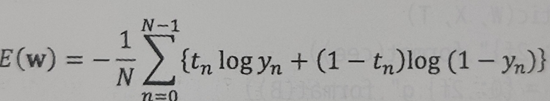

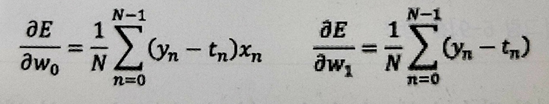

### 경사하강법 scipy.optimize에서 minimize()를 이용하기

w0 = 8.17, w1 = -9.38
0.5를 넘는 지점 i의 최솟값: 46 0.5288556221187974
CEE = 0.25
Boundary = 1.15 g


C:\Anaconda\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


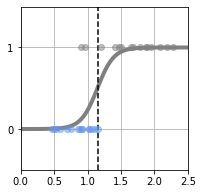

In [12]:
from scipy.optimize import minimize


# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t),
                    jac=dcee_logistic, method="Nelder-Mead") # (A)
    return res1.x



# 메인 ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()


minimize(원래함수, w초기값(최적화할 매개변수), args(압력, 라벨), jac = 함수의 미분한 모습, method = 켤레기울기법)

# 입력이 2차원인 경우

In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? t
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed = 1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype = np.uint8)
T2 = np.zeros((N, 2), dtype = np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) #분포의 중심 T3가 0번 열이면 0번행의 mu를 더하기, T3의 1의 위치가 1번열이면 1번행 mu더하기 
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) 
Pi = np.array([0.4, 0.8, 1]) #Pi는 1을매핑하는 기준이다.
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        #Pi 0.4보다 작으면 0번 열에 1매핑, 0.8보다작으면 1번 열에 1매핑 0.8보다 크면 2번열에 1을 매핑
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
 
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]    #가우스분포이다. 표준편차를 곱하고 평균을 더했다.
                   +Mu[T3[n, :] == 1, k])
      

T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1]|T3[:, 2] #T2는 2개 클래스 분류용 T3는 3개 클래스분류용이다. T3의 1번열과 2번열의 or로 만들었다. (둘중하나가 1이면 1)


랜덤의 수를 생성 Pi의 0번 인덱스보다 작으면 0번 열에, Pi의 1번 열보다 작으면 1번 열, 2개보다 크면 2번열에 1을 매핑을 한다.
<br>T3[n, :]==1, k의 의미는 T3[n, :]==1는 행을 슬라이싱, k는 열을 슬라이싱한다.
<br>X는 입력데이터로 가우스 분포를 따른다. X는 입력이 2개인 벡터이다. 난수\* 시그마+평균으로 만들었다.

In [15]:
print(X[:5, :]) #입력데이터 상위 5개 출력

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [16]:
print(X[:5, :]) #입력데이터 상위 5개 출력

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [17]:
print(T2[:5, :])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [18]:
print(T3[:5, :])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


원-핫 인코딩(One-Hot Encoding)은 여러 기법 중 단어를 표현하는 가장 기본적인 표현 방법이다. 
<br>원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 
<br>다른 인덱스에는 0을 부여하는 벡터 표현 방식이다.

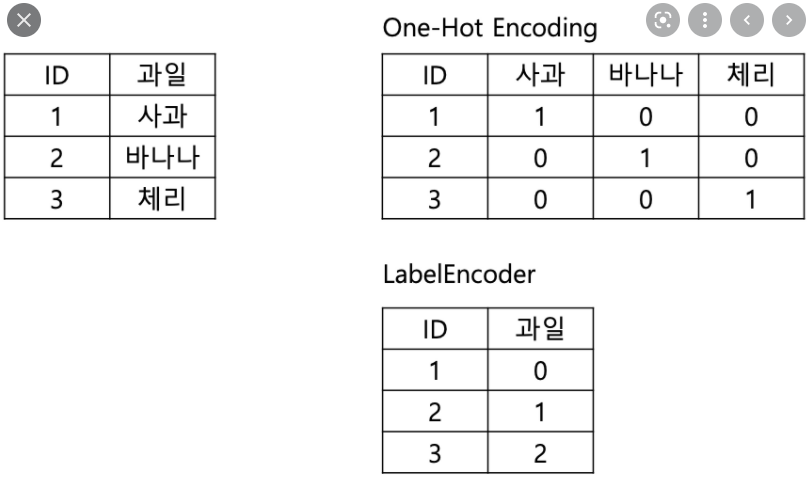

(100, 3)


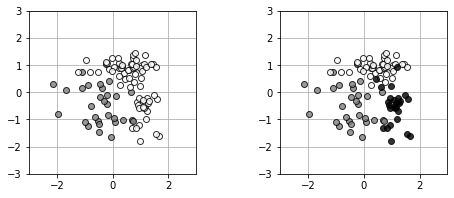

In [19]:
print(T3.shape)
#시각화 하기
def show_data2(x, t):
    wk, K = t.shape #(100, 3)
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] ==1, 0], x[t[:, k] ==1, 1], linestyle = 'none', markeredgecolor = 'black',
                marker = 'o', color = c[k], alpha = 0.8)
        plt.grid(True)
        
plt.figure(figsize = (7.5, 3))
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 1)
show_data2 (X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
    

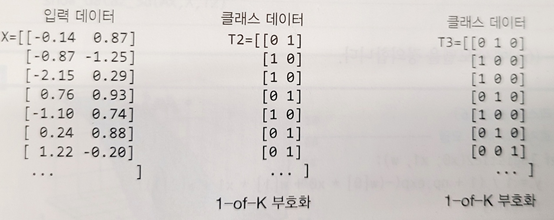

### 2개의 카테고리 출력에 따른 로지스틱 회귀모델

1차원 입력 출력에서 2차원으로 입력출력이 바뀐다.
<br> $a_n = w_0x_0+w_1$에서 $a_n = w_0x_0+w_1x_1+w_2$로 바꾸기만 하면 된다.

In [20]:
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

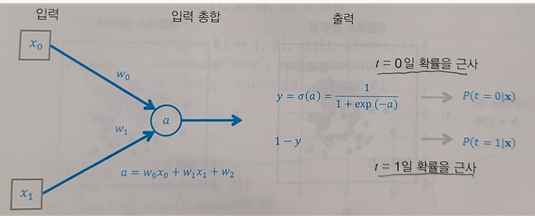

입력에 $x_0$과 $x_1$이 들어가면 선형 연산을 한 뒤, 로지스틱 시그모이드에 집어 넣어서 t = 0일때와 t = 1일때의 확률을 각각 출력한다.

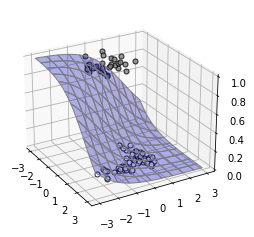

In [21]:
#2개의 입력과 이진 분류에 따른 평면 그리기
from mpl_toolkits.mplot3d import axes3d


def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',
                    rstride=5, cstride=5, alpha=0.3)


def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i,
                marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    Ax.view_init(elev=25, azim=-30)

    
    
fig = plt.figure(figsize=(4, 4))
# test ---
Ax = fig.add_subplot(1, 1, 1, projection='3d')
W=[-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)

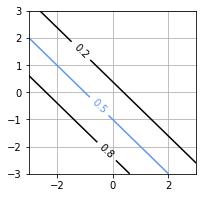

In [22]:
def show_contour_logistic2( w):
    xn = 30
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels = (0.2, 0.5, 0.8), colors=['k', 'cornflowerblue', 'k'])
    
    cont.clabel(fmt = '%1.1f', fontsize = 10)
    plt.grid(True)

plt.figure(figsize = (3, 3))
W = [-1, -1, -1]
show_contour_logistic2(W)


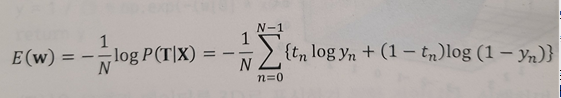

평균 교차 엔트로피를 정의한다.
<br> $t_n$은 정답을 의미하고 $y_n$은 출력값을 의미한다. 

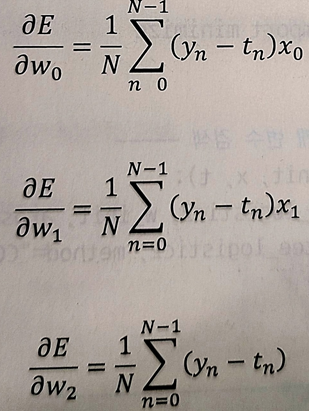

In [23]:
#교차 엔트로피 정의
def cee_logistic2(w, x, t):
    X_n = x.shape[0] #X의 행의 개수가 X의 데이터의 개수
    y = logistic2(x[:, 0], x[:, 1], w) 
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) + (1 - t[n,0]) * np.log(1 - y[n]))
        cee = cee / X_n
        return cee

w_0, w_1, w_2에 대해 미분

In [24]:
def dcee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0]) 
        
    dcee /= X_n
    return dcee
W = [-1, -1, -1]
dcee_logistic2(W, X, T2)
    

array([ 0.10272008,  0.04450983, -0.06307245])

w0 = -3.75, w1 = -2.58, w2 = -0.27
CEE = 0.00


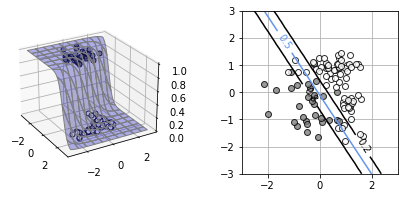

In [25]:
# 리스트 6-2-(11)
from scipy.optimize import minimize


# 로지스틱 회귀 모델의 매개 변수 검색 -
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method="CG")
    return res.x


# 메인 ------------------------------------
plt.figure(figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)


Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)


show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))


Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

평면을 넣었기 때문에 이 모델의 결정 경계는 직선이 된다. 

### 3개의 클래스 분류

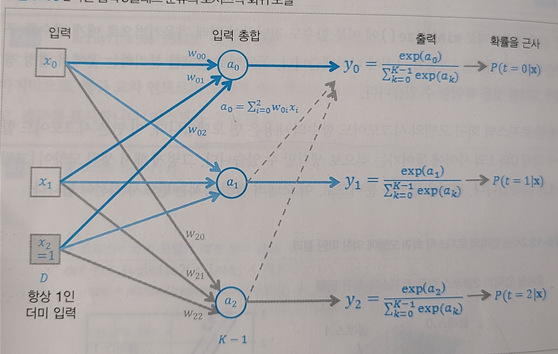

WX+B라는 선형 연산을 한 뒤에 소프트맥스라는 비선형 함수를 통과한다.

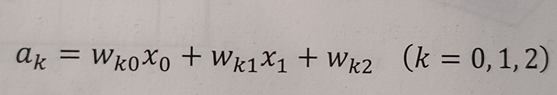

여기서 K는 카테고리라는 의미를 내포한다. $w_{00}$의 의미는 w의 0번 카테고리의 0차원에 대한 매개변수이다.
<br>모델의 입력 x =[x_0, x_1, x_2] 출력이 확률로 [y_0, y_1, y_2]가 나온다.
<br> 1\*3의 입력과 1\*3의 출력이 나오기 때문에 행렬곱을 위해 3\*3의 W가 필요한 것을 알 수 있다.

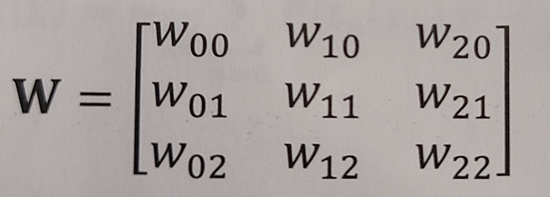

이진 분류일때와 차이점: 이진분류일 때는 출력값이 하나만 나와서 기준 선에따라 1 아니면 0으로 mapping 되는 원리
<br>였기 때문에 W는 입력의 차원에 따라 다르지만, 
<br>다중 카테고리의 경우, 입력이 카테고리별로 하나씩 선형 연산을 하여 카테고리개수만큼 확률값을 출력하기 때문에 
<br>입력의 차원과 출력할 카테고리의 개수에따라 매개변수의 개수가 결정된다.

In [37]:
def logistic3(x0, x1, w):
    K = 3 #이때 K는 카테고리이다. 
    w = w.reshape((3, 3))
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])
    wk = np.sum(y, axis =1)
    wk = y.T/wk
    y = wk.T
    return y
    
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y,3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


### 교차 엔트로피를 사용한다.

$P(T = [1, 0, 0]|X) = y_0$

이식의 의미는 모집합중에 입력 X라는 집합에 속하면서 0번 카테고리에 속할 확률을 의미한다.

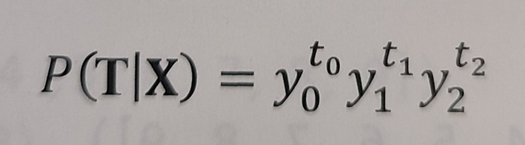

임의의 데이터 한개가 1번째 카테고리에 속할 확률을 예시로 들었다.
<br>이깨 1번카테고리가 1이기 때문에 $t_0,t_1 = 0$, $t_1=1$이다.

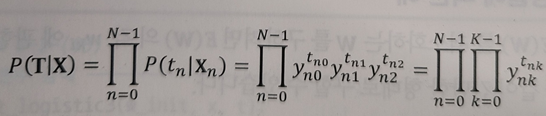

이걸 N개로 일반화하기 위해 모두 곱했다.

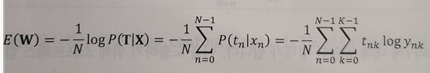

그리고 표현하기 쉽게 로그를 취했으며 평균을 구하기 위해 데이터의 개수 N개로 나눴다.
<br>마지막으로 앞에 -를 넣음으로써, 곱의 최대가 목적함수의 최소로 갈 수 있게 만들었다.(곱이 제일 큰 것이 가장 잘맞춘 경우이다.)

In [40]:
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range (K):
            cee = cee - (t[n, k]*np.log(y[n, k]))
    cee = cee/X_n
    return cee
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
cee_logistic3(W, X, T3)


3.9824582404787288

### 경사하강법에 의한 해를 구하기

In [41]:
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3)) # (클래스의 수 K) x (x의 차원 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)


# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [42]:
#매개변수를 탐색하기
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method="CG")
    return res.x

In [43]:
def show_contour_logistic3(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)


    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                           levels=(0.5, 0.9),
                           colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


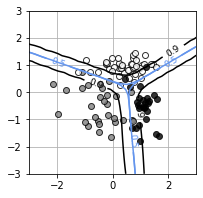

In [44]:
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))


plt.figure(figsize=(3, 3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()